In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


import cudf
import pandas as pd
print("cuDF version:", cudf.__version__)
print("pandas version:", pd.__version__)

%matplotlib inline

cuDF version: 0.9.0
pandas version: 0.24.2


# Create DataFrame

In [2]:
# Define by column
gdf = cudf.DataFrame()
gdf['my_column'] = [1, 2, 3]

gdf

,my_column
0,1
1,2
2,3


In [3]:
# Define from dict
gdf = cudf.DataFrame({'a': [1, 2, 3],
                      'b': [4, 5, 6]})

gdf

,a,b
0,1,4
1,2,5
2,3,6


In [4]:
pdf = pd.DataFrame({'a': [0, 1, 2, 3],'b': [0.1, 0.2, None, 0.3]})
gdf = cudf.from_pandas(pdf)

gdf

,a,b
0,0,0.1
1,1,0.2
2,2,null
3,3,0.3


In [5]:
# Read from CSV
gdf = cudf.read_csv('diabetes.csv', delimiter=',')

gdf.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# Data Operation

In [6]:
# Some functions are not implemented; we need to go back to pandas.
gdf.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
gdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/root/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


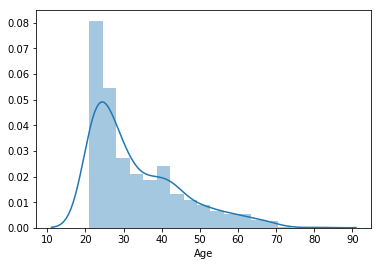

In [8]:
# Plotting using seaborn
ax = sns.distplot(gdf['Age'])

In [9]:
# Average, Std of columns
print("Age avg:", gdf['Age'].mean())
print("Age std:", gdf['Age'].std())

Age avg: 33.240885416666664
Age std: 11.760231540678697


In [10]:
# Value counts
gdf['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int32

In [11]:
# Number of unique values
gdf['Age'].nunique()

52

In [12]:
# Filter data
gdf.query('Age > 65')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
221,2,158,90,0,0,31.6,0.805,66,1
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
495,6,166,74,0,0,26.6,0.304,66,0
537,0,57,60,0,0,21.7,0.735,67,0
552,6,114,88,0,0,27.8,0.247,66,0
666,4,145,82,18,0,32.5,0.235,70,1


In [13]:
gdf.sort_values(by='Age', ascending=False).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.460,81,0
453,2,119,0,0,0,19.6,0.832,72,0
666,4,145,82,18,0,32.5,0.235,70,1
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0
674,8,91,82,0,0,35.6,0.587,68,0
363,4,146,78,0,0,38.5,0.520,67,1
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
221,2,158,90,0,0,31.6,0.805,66,1


In [14]:
# Do group by operations
gdf.groupby(['Age']).agg({'Pregnancies': 'sum'}).head()

,Pregnancies
Age,
21,68
22,112
23,60
24,87
25,85


In [15]:
# Apply operation to a Series
gdf['Age_doubled'] = gdf['Age'].applymap(lambda x: x*2)
gdf.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_doubled
0,6,148,72,35,0,33.6,0.627,50,1,100
1,1,85,66,29,0,26.6,0.351,31,0,62
2,8,183,64,0,0,23.3,0.672,32,1,64
3,1,89,66,23,94,28.1,0.167,21,0,42
4,0,137,40,35,168,43.1,2.288,33,1,66
5,5,116,74,0,0,25.6,0.201,30,0,60
6,3,78,50,32,88,31.0,0.248,26,1,52
7,10,115,0,0,0,35.3,0.134,29,0,58
8,2,197,70,45,543,30.5,0.158,53,1,106
9,8,125,96,0,0,0.0,0.232,54,1,108


In [16]:
# Apply operation to a DataFrame
def triple_age(Age, Age_tripled):
    for i, age in enumerate(Age):
        Age_tripled[i] = age * 3.0 
    
gdf.apply_rows(triple_age,
               incols=['Age'],
               outcols=dict(Age_tripled=np.int),
               kwargs=dict()
              ).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_doubled,Age_tripled
0,6,148,72,35,0,33.6,0.627,50,1,100,150
1,1,85,66,29,0,26.6,0.351,31,0,62,93
2,8,183,64,0,0,23.3,0.672,32,1,64,96
3,1,89,66,23,94,28.1,0.167,21,0,42,63
4,0,137,40,35,168,43.1,2.288,33,1,66,99
5,5,116,74,0,0,25.6,0.201,30,0,60,90
6,3,78,50,32,88,31.0,0.248,26,1,52,78
7,10,115,0,0,0,35.3,0.134,29,0,58,87
8,2,197,70,45,543,30.5,0.158,53,1,106,159
9,8,125,96,0,0,0.0,0.232,54,1,108,162
